In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import LocalOutlierFactor

In [25]:
import pandas as pd
df_Churn = pd.read_csv("Churn_Modeling.csv")
df_Churn

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Unnamed: 14,Unnamed: 15
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Approved,NaN,active with different functionalities with ban...
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Reject,NaN,NaN
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Approved,NaN,salary estimated by bank
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Reject,NaN,NaN
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Reject,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Reject,NaN,NaN
9996,9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Reject,NaN,NaN
9997,9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Approved,NaN,NaN
9998,9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Approved,NaN,NaN


<ipython-input-29-a4eaaa3bed23>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_Churn.corr()


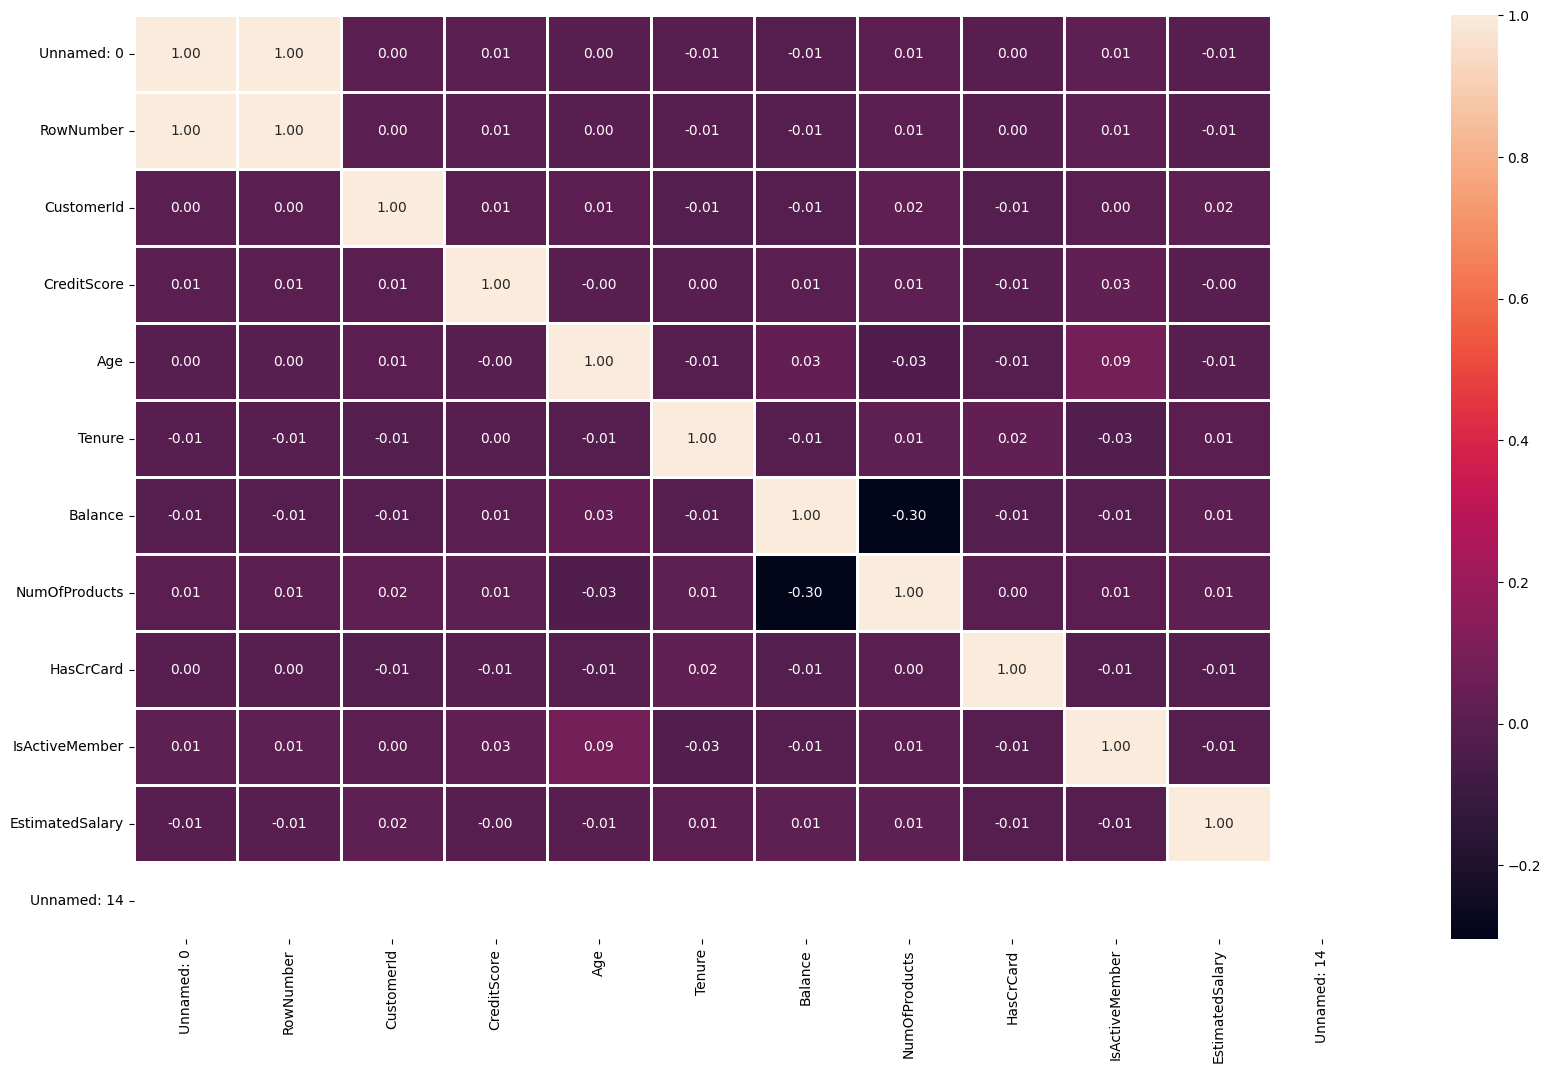

In [29]:
# heatmap
import seaborn as sbs
plt.figure(figsize = (20, 12))

corr = df_Churn.corr()

sbs.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [3]:
df_Churn.groupby('Exited').count()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Unnamed: 14,Unnamed: 15
Exited,,,,,,,,,,,,,,,,
Approved,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,0,3
Reject,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,0,0


In [4]:
X = df_Churn[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [5]:
y = df_Churn[['Exited']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [9]:
len(X_test)

2000

In [10]:
y_test


,Exited
2688,Reject
233,Reject
9099,Reject
8652,Reject
2842,Approved
...,...
4395,Reject
8669,Reject
7634,Reject
556,Reject


In [11]:
# Random Forest: combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption,
# as it handles both classification and regression problems
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

<ipython-input-11-247a546b6baf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(random_state=20).fit(X_train, y_train)


0.841

In [12]:
# Calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
acc_score = accuracy_score(y_test, predictions)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Calculate the confusion matrix
#
confusion_matrix(y_true=y_test, y_pred=y_pred)


Confusion Matrix
Accuracy Score : 0.841
Classification Report
              precision    recall  f1-score   support

    Approved       0.70      0.41      0.51       414
      Reject       0.86      0.95      0.90      1586

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.82      2000



array([[ 168,  246],
       [  72, 1514]])

In [ ]:
# In the above confusion matrix, out of 1586 actual positives, 1514 are correctly predicted positives. Thus, the value of True Positive is 1514.

In [13]:
# save the classification model as a pickle file
features = list(zip(df_Churn['CreditScore'],df_Churn['Age'],df_Churn['Tenure'],df_Churn['Balance'],df_Churn['NumOfProducts'],df_Churn['HasCrCard'],df_Churn['IsActiveMember'],df_Churn['EstimatedSalary']))
import pickle
rf_model.fit(features,df_Churn['Exited'])
pickle.dump(rf_model, open('model.pkl','wb'))

In [14]:
# Artificial Neural Network
# MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network
# Most of these frameworks and tools, however, require many lines of code to implement when compared to a simple library from Scikit-Learn
from sklearn.neural_network import MLPClassifier
mlpc_model = MLPClassifier(random_state=20).fit(X_train, y_train)
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.63

In [15]:
# Calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Making predictions using the testing data
predictions_mlpc = mlpc_model.predict(X_test)
acc_score = accuracy_score(y_test, predictions_mlpc)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions_mlpc))

# Calculate the confusion matrix
#
confusion_matrix(y_true=y_test, y_pred=y_pred)


Confusion Matrix
Accuracy Score : 0.63
Classification Report
              precision    recall  f1-score   support

    Approved       0.25      0.40      0.31       414
      Reject       0.82      0.69      0.75      1586

    accuracy                           0.63      2000
   macro avg       0.53      0.55      0.53      2000
weighted avg       0.70      0.63      0.66      2000



array([[ 166,  248],
       [ 492, 1094]])

In [16]:
# Gradient Boosting Machines
# It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=20).fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.848

In [17]:
# Calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Making predictions using the testing data
predictions_gbm = gbm_model.predict(X_test)
acc_score = accuracy_score(y_test, predictions_gbm)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions_gbm))

# Calculate the confusion matrix
#
confusion_matrix(y_true=y_test, y_pred=y_pred)


Confusion Matrix
Accuracy Score : 0.848
Classification Report
              precision    recall  f1-score   support

    Approved       0.76      0.39      0.51       414
      Reject       0.86      0.97      0.91      1586

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



array([[ 161,  253],
       [  51, 1535]])

In [18]:
# LightGBM
# LightGBM is a gradient boosting ensemble method that is used by the Train Using AutoML tool and is based on decision trees.
# As with other decision tree-based methods, LightGBM can be used for both classification and regression. LightGBM is optimized for high performance
# with distributed systems
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=20).fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 6377, number of negative: 1623
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.797125 -> initscore=1.368421
[LightGBM] [Info] Start training from score 1.368421


0.8425

In [19]:
# Calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Making predictions using the testing data
predictions_lgbm = lgbm_model.predict(X_test)
acc_score = accuracy_score(y_test, predictions_lgbm)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions_lgbm))

# Calculate the confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

Confusion Matrix
Accuracy Score : 0.8425
Classification Report
              precision    recall  f1-score   support

    Approved       0.70      0.42      0.52       414
      Reject       0.86      0.95      0.91      1586

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



array([[ 173,  241],
       [  74, 1512]])

In [21]:
df_Churn['Exited'] = df_Churn['Exited'].apply({'Reject':0, 'Approved':1}.get)

y = df_Churn[['Exited']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [22]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [23]:
# XGBoost
# It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=20, eval_metric='mlogloss').fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.836

In [24]:
# Calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Making predictions using the testing data
predictions_xgb = xgb_model.predict(X_test)
acc_score = accuracy_score(y_test, predictions_xgb)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions_xgb))

# Calculate the confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)


Confusion Matrix
Accuracy Score : 0.836
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1586
           1       0.67      0.40      0.50       414

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.70      2000
weighted avg       0.82      0.84      0.82      2000



array([[1505,   81],
       [ 247,  167]])